In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

In [15]:
df = pd.read_csv("data/Phishing_Legitimate_full.csv")   

In [16]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [18]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df["CLASS_LABEL"]

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

<Axes: xlabel='NumDash'>

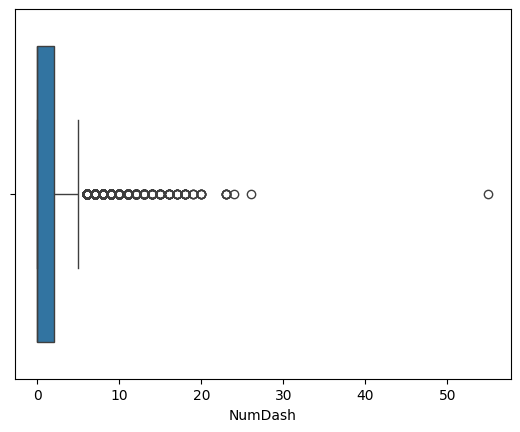

In [7]:
sns.boxplot(df, x="NumDash")

In [9]:
# outlier = df[df["NumDash"] > 30].index
# outlier

Index([6399], dtype='int64')

In [10]:
# df = df.drop(outlier)   # me cargo una fila en 0

In [20]:
df["CLASS_LABEL"].value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

In [21]:
df["HttpsInHostname"].value_counts() 

HttpsInHostname
0    10000
Name: count, dtype: int64

In [225]:
# qué puedo analizar más?

In [22]:
correlaciones=df.corr()                          
correlaciones["CLASS_LABEL"].sort_values()           # Por qué en HttpsInHostname:NaN ?

# Esta forma no es muy atractiva

id                                   -0.866025
PctExtNullSelfRedirectHyperlinksRT   -0.540545
NumDash                              -0.372235
SubmitInfoToEmail                    -0.357635
IframeOrFrame                        -0.235233
NumQueryComponents                   -0.147391
AbnormalFormAction                   -0.145073
DomainInPaths                        -0.118201
ExtFormAction                        -0.105164
NumUnderscore                        -0.098869
RandomString                         -0.085308
RelativeFormAction                   -0.082589
NumAmpersand                         -0.081446
QueryLength                          -0.080525
PathLength                           -0.076125
SubdomainLevelRT                     -0.075799
UrlLength                            -0.074493
NoHttps                              -0.072219
NumPercent                           -0.068465
PopUpWindow                          -0.067308
PctExtResourceUrls                   -0.021922
AtSymbol     

In [32]:
df = df.drop(columns="id")   # el id no aporta nada

In [33]:
# Defino la X y la y porque las necesito para sacar las variables importantes
X = df.drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier()

In [35]:
importancias_caracteristicas = rfc.feature_importances_
importancias_df = pd.DataFrame({'Caracteristica': X.columns, 'Importancia': importancias_caracteristicas})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

print(importancias_df)

                        Caracteristica  Importancia
6                     PctExtHyperlinks     0.296908
14  PctExtNullSelfRedirectHyperlinksRT     0.198992
8        PctNullSelfRedirectHyperlinks     0.092444
9           FrequentDomainNameMismatch     0.086081
2                              NumDash     0.065403
1                            PathLevel     0.048975
7                        InsecureForms     0.043330
10                   SubmitInfoToEmail     0.037575
4                       HostnameLength     0.032264
0                              NumDots     0.025233
11                       IframeOrFrame     0.024084
5                    NumSensitiveWords     0.016338
12                         UrlLengthRT     0.011601
3                    NumDashInHostname     0.010704
13              AbnormalExtFormActionR     0.010069


In [36]:
df_importancias_top10= importancias_df.head(10)
df_importancias_top10

,Caracteristica,Importancia
6,PctExtHyperlinks,0.296908
14,PctExtNullSelfRedirectHyperlinksRT,0.198992
8,PctNullSelfRedirectHyperlinks,0.092444
9,FrequentDomainNameMismatch,0.086081
2,NumDash,0.065403
1,PathLevel,0.048975
7,InsecureForms,0.043330
10,SubmitInfoToEmail,0.037575
4,HostnameLength,0.032264
0,NumDots,0.025233


In [232]:
# Pruebo a filtrar para mostrar con un mapa de calor las variables que están más correlacionadas

In [37]:
filtro = correlaciones[(correlaciones['CLASS_LABEL']>0.15) | (correlaciones['CLASS_LABEL']<-0.15)]

In [38]:
mantener = filtro["CLASS_LABEL"].index
columnas = [col for col in df.columns if col not in mantener]

In [39]:
df = df.drop(columns=columnas)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   PathLevel                           10000 non-null  int64  
 2   NumDash                             10000 non-null  int64  
 3   NumDashInHostname                   10000 non-null  int64  
 4   HostnameLength                      10000 non-null  int64  
 5   NumSensitiveWords                   10000 non-null  int64  
 6   PctExtHyperlinks                    10000 non-null  float64
 7   InsecureForms                       10000 non-null  int64  
 8   PctNullSelfRedirectHyperlinks       10000 non-null  float64
 9   FrequentDomainNameMismatch          10000 non-null  int64  
 10  SubmitInfoToEmail                   10000 non-null  int64  
 11  IframeOrFrame                       10000 

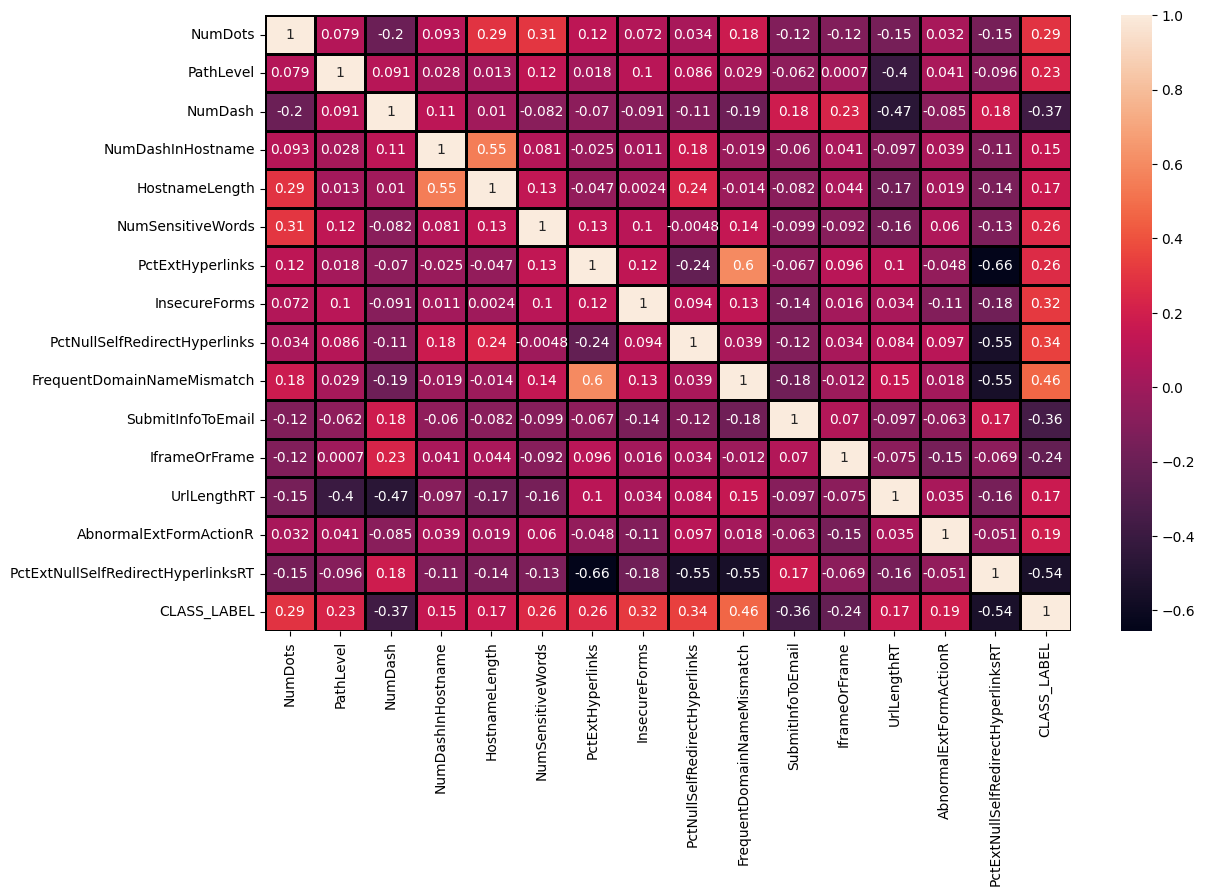

In [41]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor="black");

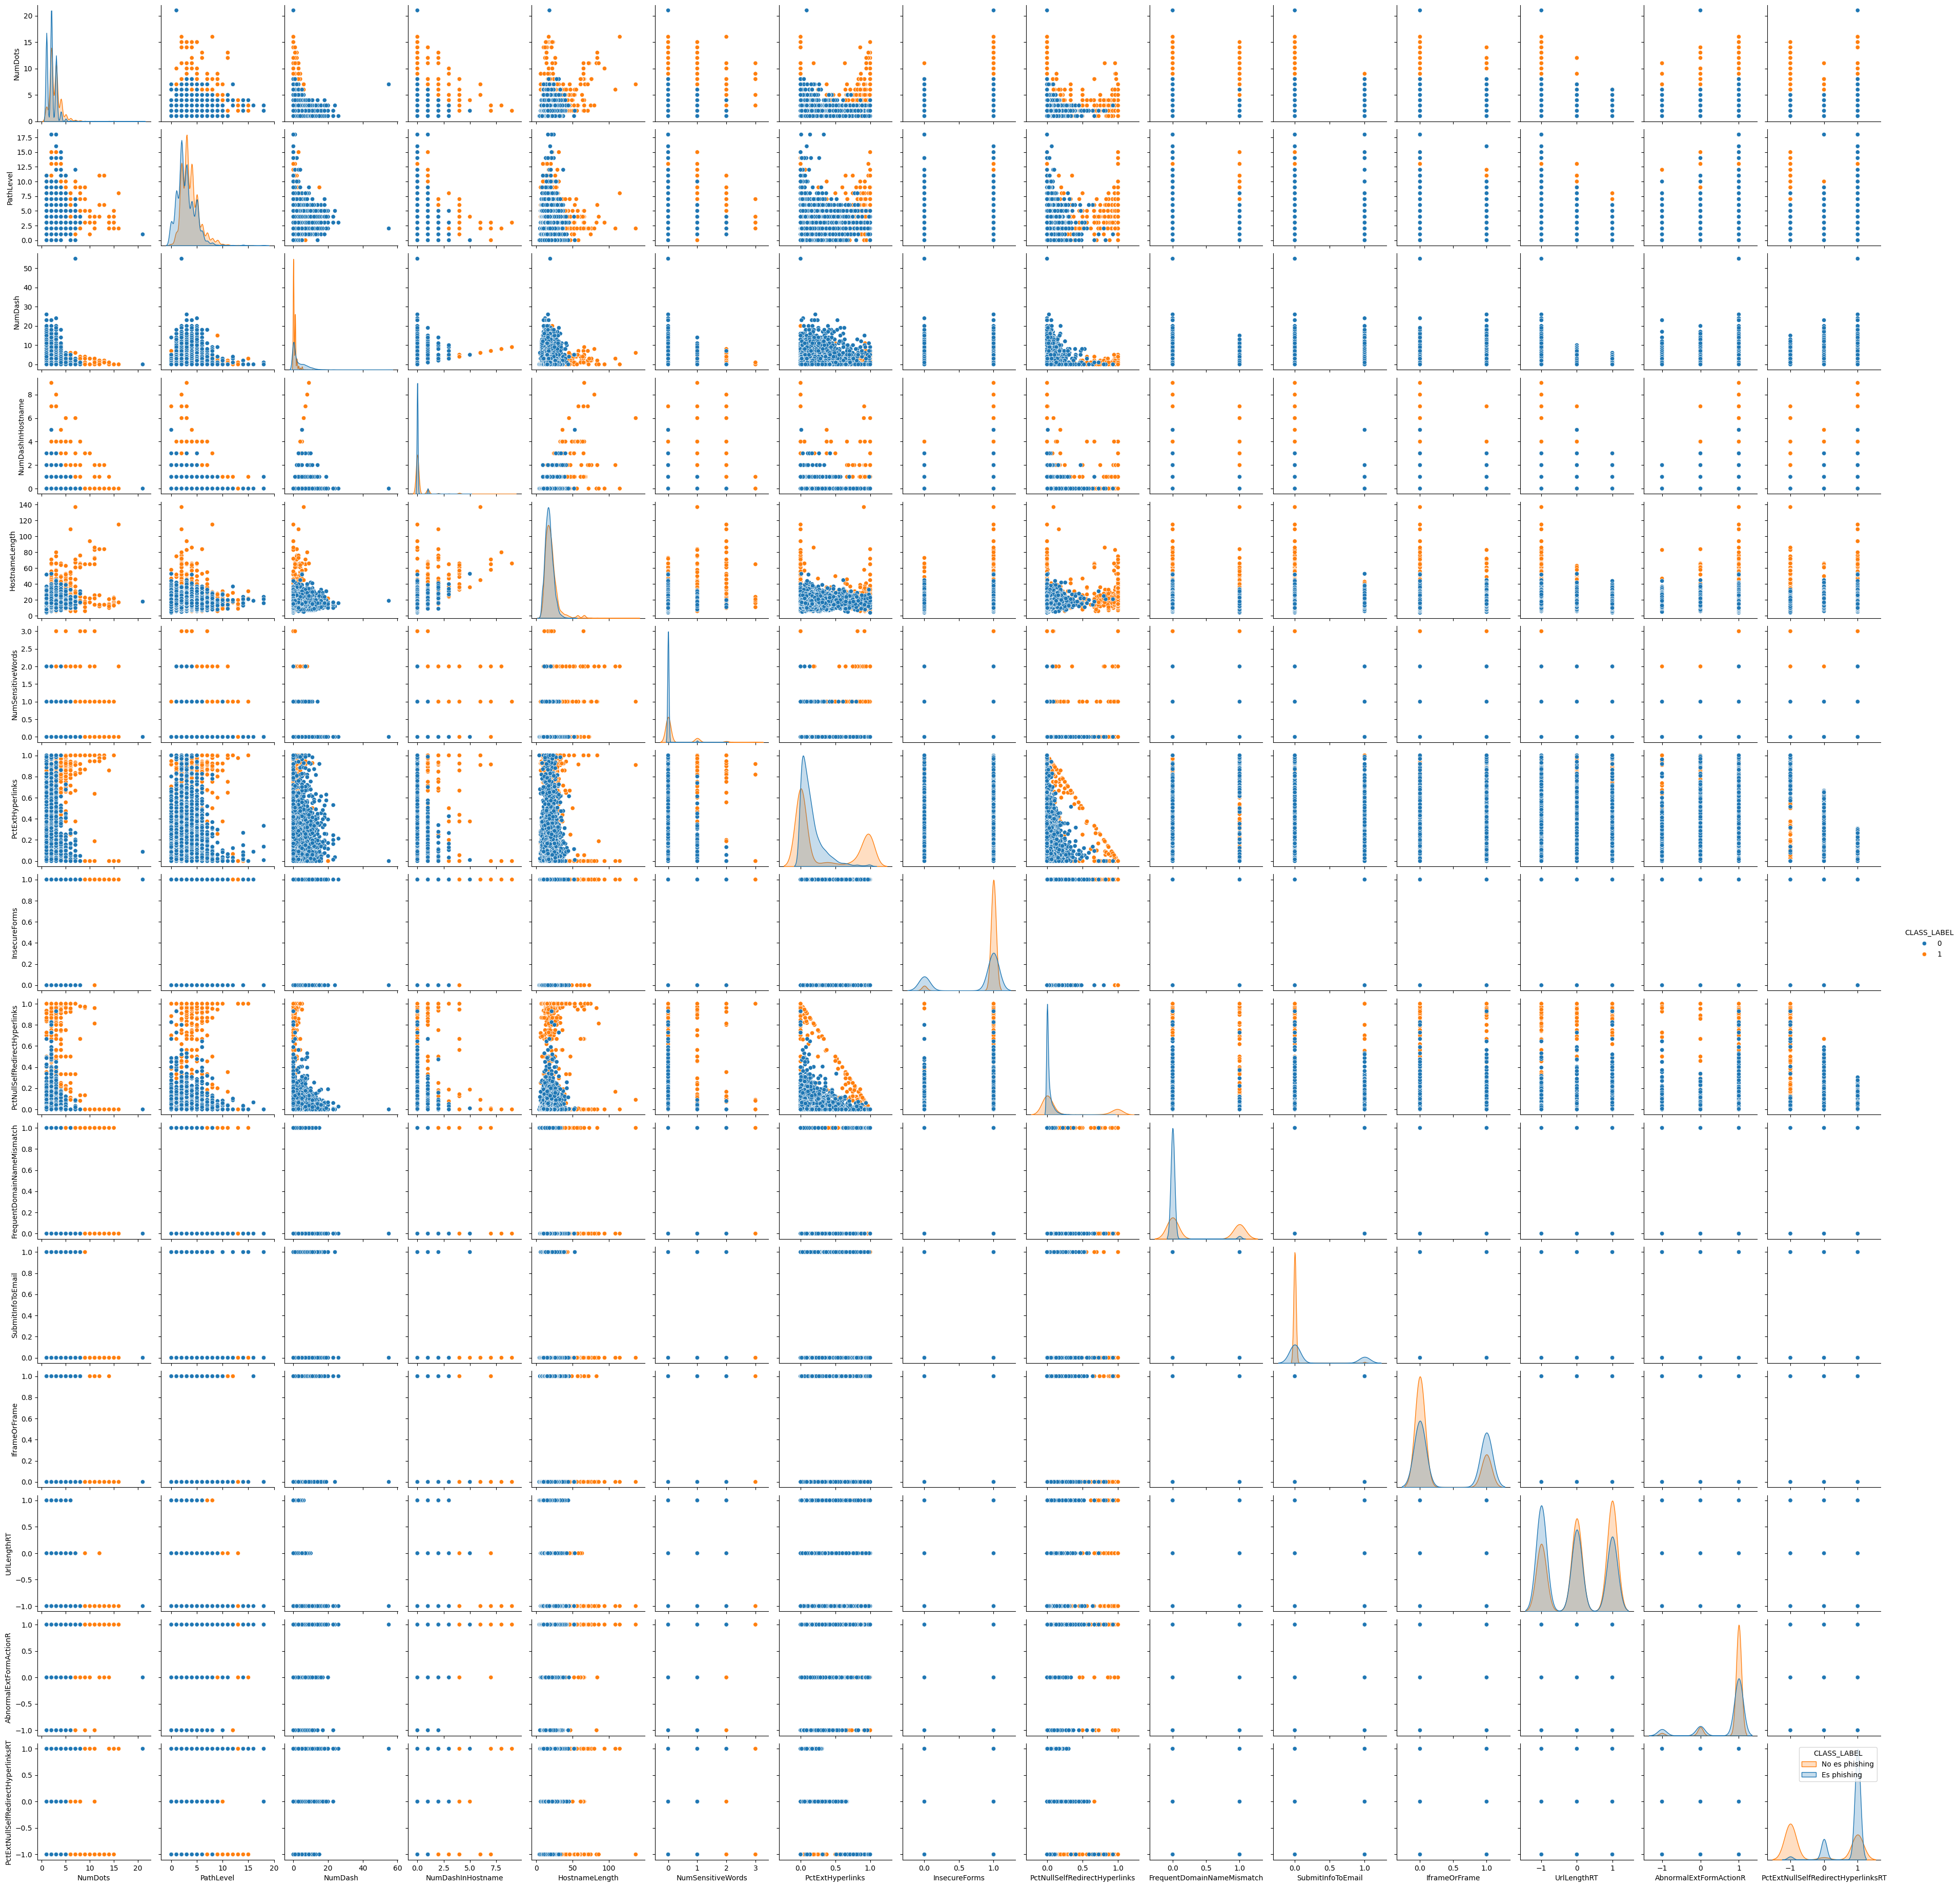

In [43]:
sns.pairplot(df, hue="CLASS_LABEL")
plt.legend(title="CLASS_LABEL", labels=["No es phishing", "Es phishing"])

In [239]:
X = df.drop("CLASS_LABEL", axis=1)
y = df['CLASS_LABEL']

In [240]:
print(X.shape)
print(y.shape)

(9999, 15)
(9999,)


In [241]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [242]:
X_scaled.shape

(9999, 15)

In [243]:
# En el mismo Pipeline, todos los modelos. Los supervisados y el no supervisado

In [244]:
from sklearn.decomposition import PCA

In [245]:
# PRÁCTICA:
pca = PCA(n_components=15)
X_pca = pca.fit(X)

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
pca.explained_variance_ratio_       # por qué ponemos esto ??

array([7.91892266e-01, 1.16461777e-01, 4.28016454e-02, 1.88022797e-02,
       1.08611919e-02, 4.22022575e-03, 3.47422321e-03, 2.40216946e-03,
       2.30914793e-03, 1.85829458e-03, 1.56678659e-03, 1.29112114e-03,
       1.18249191e-03, 8.37991159e-04, 3.83880335e-05])

In [248]:
pca.explained_variance_ratio_.cumsum()              #

array([0.79189227, 0.90835404, 0.95115569, 0.96995797, 0.98081916,
       0.98503939, 0.98851361, 0.99091578, 0.99322493, 0.99508322,
       0.99665001, 0.99794113, 0.99912362, 0.99996161, 1.        ])

In [249]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("classifier", RandomForestClassifier())
])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier())])

In [250]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [251]:
print("recall_score", recall_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

recall_score 0.9378698224852071
confusion_matrix
 [[913  73]
 [ 63 951]]


In [252]:
pipe_gs_rf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("classifier", RandomForestClassifier())
])
pipe_gs_rf

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('classifier', RandomForestClassifier())])

In [253]:
params = {
    "scaler" : [StandardScaler(), None],
    "pca__n_components": [5,6,7],
    "classifier__max_depth": np.arange(3,7),
    "classifier__min_samples_leaf": [2,3,4]
}

In [254]:
gs = GridSearchCV(pipe_gs_rf, params, cv=5, scoring="recall")

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': array([3, 4, 5, 6]),
                         'classifier__min_samples_leaf': [2, 3, 4],
                         'pca__n_components': [5, 6, 7],
                         'scaler': [StandardScaler(), None]},
             scoring='recall')

In [255]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'classifier__max_depth': 6, 'classifier__min_samples_leaf': 4, 'pca__n_components': 6, 'scaler': StandardScaler()}
0.9320129055386271
Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=6)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=4))])


In [256]:
final_model1 = gs.best_estimator_.fit(X_train, y_train)
y_pred = final_model1.predict(X_test)
print("recall_score", recall_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

recall_score 0.9240631163708086
confusion_matrix
 [[886 100]
 [ 77 937]]


In [257]:
# Continuar por aquí

In [258]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())     # Por qué aquí ponemos un RandomFC y luego ponemos 5 modelos? 
])

In [259]:
log_params = {
    "scaler" : [StandardScaler(), None],
    "selectkbest__k":np.arange(5,15),
    "classifier": [LogisticRegression()],
    "classifier__C": [0.1,1,10]                # revisar parámetros
}
rf_params = {
    "scaler" : [StandardScaler(), None],
    "selectkbest__k":np.arange(5,15),
    "classifier": [RandomForestClassifier()],
    "classifier__max_depth": [3,5,7]
}
gb_params = {
    "scaler" : [StandardScaler(), None],
    "selectkbest__k":np.arange(5,15),
    "classifier": [GradientBoostingClassifier()],
    "classifier__max_depth": [3,5,7]
}
knn_params = {
    "scaler" : [StandardScaler(), None],
    "selectkbest__k":np.arange(5,15),
    "classifier": [KNeighborsClassifier()],
    "classifier__n_neighbors": np.arange(5,15)
}
svm_params = {
    "scaler" : [StandardScaler(), None],
    "selectkbest__k":np.arange(5,15),
    "classifier": [SVC()],
    "classifier__C": [0.1,1,10]
}

In [260]:
search_space = [
    log_params,
    rf_params,
    gb_params,
    knn_params,
    svm_params   
]

In [261]:
# RECUERDA: clf_gs: se utiliza para realizar búsqueda de hiperparámetros mediante validación cruzada. 
# GridSearch prueba todas las combis posibles.

clf_gs = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, scoring="recall", verbose=3, n_jobs=-1)

# he cambiado el accuracy por recall

In [262]:
# Más adelante: RandomizedSearchCV prueba combinaciones de forma aleatoria. Aconsejable cuando el espacio de búsqueda es grande
# Debería quitarla?

In [263]:
clf_gs.fit(X_train, y_train)     # comentar advertencias. Antes no me salían

Fitting 3 folds for each of 440 candidates, totalling 1320 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1, 10],
                          'scaler': [StandardScaler(), None],
                          'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                         {'classifier': [RandomForestClassifi...
                          'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'scaler': [StandardScaler(), None],
                          'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                         {'classifier': [SVC()], 'classifier__C': [0.1, 1, 10],
                          'scaler': [StandardScaler(), None],
                          'selectkbest__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             scoring='recall', verbose=3)

In [264]:
print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest()),
                ('classifier', GradientBoostingClassifier(max_depth=7))])
0.9721523414954022
{'classifier': GradientBoostingClassifier(), 'classifier__max_depth': 7, 'scaler': None, 'selectkbest__k': 10}


In [265]:
final_model2 = clf_gs.best_estimator_
final_model2.fit(X_train, y_train)
y_pred = final_model2.predict(X_test)

In [266]:
print("recall_score", recall_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

recall_score 0.9763313609467456
confusion_matrix
 [[949  37]
 [ 24 990]]


In [267]:
clf_rs = RandomizedSearchCV(estimator=pipe, param_distributions=search_space, cv=3, scoring="recall", verbose=3, n_jobs=-1)
clf_rs.fit(X_train, y_train)

print(clf_rs.best_estimator_)
print(clf_rs.best_score_)
print(clf_rs.best_params_)

final_model3 = clf_rs.best_estimator_
final_model3.fit(X_train, y_train)
y_pred = final_model3.predict(X_test)

print("recall_score", recall_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest()),
                ('classifier', GradientBoostingClassifier(max_depth=5))])
0.9701443093668881
{'selectkbest__k': 10, 'scaler': StandardScaler(), 'classifier__max_depth': 5, 'classifier': GradientBoostingClassifier()}
recall_score 0.965483234714004
confusion_matrix
 [[953  33]
 [ 35 979]]


In [268]:
# np.logspace()   # es conveniente este caso, poner este rango??   log-mejorar la distribución. logspace??

In [269]:
# vuelvo a hacer el mismo proceso con logspace() 

In [270]:
# log_params = {
#     'selectkbest__k':np.arange(5,15),
#     'classifier': [LogisticRegression()],
#     'classifier__C': np.logspace(-2,2)
# }
# rf_params = {
#     'selectkbest__k':np.arange(5,15),
#     'classifier': [RandomForestClassifier()],
#     'classifier__max_depth': np.arange(2,10)
# }
# gb_params = {
#     'selectkbest__k':np.arange(5,15),
#     'classifier': [GradientBoostingClassifier()],
#     'classifier__max_depth': np.arange(2,10)
# }
# knn_params = {
#     'selectkbest__k':np.arange(5,15),
#     'classifier': [KNeighborsClassifier()],
#     'classifier__n_neighbors': np.arange(3,20)
# }
# svm_params = {
#     'selectkbest__k':np.arange(5,15),
#     'classifier': [SVC()],
#     'classifier__C': np.logspace(-2,2)
# }

# search_space = [
#     log_params,
#     rf_params,
#     gb_params,
#     knn_params,
#     svm_params   
# ]

In [271]:
# clf_rs = RandomizedSearchCV(estimator=pipe, param_distributions=search_space, cv=3, scoring="recall", verbose=3, n_jobs=-1)
# clf_rs.fit(X_train, y_train)

In [272]:
# print(clf_rs.best_estimator_)
# print(clf_rs.best_score_)
# print(clf_rs.best_params_)

In [273]:
# final_model = clf_rs.best_estimator_
# final_model.fit(X_train, y_train)             # Revisar
# y_pred = final_model.predict(X_test)

In [274]:
# print("recall_score", recall_score(y_test, y_pred))
# print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

In [275]:
# debería de meter alguna gráfica?

In [276]:
# ESTA PARTE SÓLO PARA EL MEJOR MODELO. Revisar. Warnings importantes?
# results = cross_val_score(final_model, X, y, cv=10, scoring="recall")   
# print(results)
# print(results.mean())
# print(results.std())

In [277]:
# final_model.predict()     ????

In [278]:
# import pickle     De aquí en adelante lo sombreo para que no se importe nada aún. Revisar ejercicio PCA

In [279]:
# final_model = clf_rs.best_estimator_

# filename = 'final_model.pkl'  # hay que subirlo con esa extensión(.pkl?)

# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(final_model, archivo_salida)

In [280]:
# with open(filename, 'rb') as archivo_entrada:
#     modelo_importado = pickle.load(archivo_entrada)

In [281]:
# modelo_importado    # Estaría bien?

In [282]:
# PRACTICAR CON K-MEANS

# from sklearn.metrics import silhouette_score     # ?
# from sklearn.cluster import KMeans

In [283]:
# debo de hacer una copia del df con todas las variables? (X)

In [284]:
# km_list = [KMeans(n_clusters=k, n_init=10, random_state=0).fit(X) for k in range(2,30)]   # por qué este rango? n_init?
# km_list

In [285]:
# silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
# silhouette_score_list

In [286]:
# plt.plot(range(2,30), silhouette_score_list)
# plt.xlabel('K')
# plt.ylabel('silhouette_score')

In [287]:
# inertias = [model.inertia_ for model in km_list]
# plt.plot(range(2,30), inertias)
# plt.xlabel('nº clusters')
# plt.ylabel('inertias')

In [288]:
# kmeans = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X)
# kmeans.labels_

In [289]:
# df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
# df_clusters

In [290]:
# df_clusters['Cluster'].value_counts()

In [291]:
# df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")